In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd #Pandas
import numpy as np #Numpy
import matplotlib.pyplot as plt #Matplotlib
import seaborn as sns #seaborn

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Investigación Trejo-Castro/E31 - DBC Metabolic Health and Disease/E31.2 Bibliometric Lipidome and Metabolome/2. R_PythonCode/Comparison Annual Scientific.csv')
df.head()

,Year,Scopus,PubMed,WoSCC
0,2004,5,6,6
1,2005,9,9,10
2,2006,13,8,11
3,2007,24,15,24
4,2008,39,14,30


In [4]:
subset_df = df[['Scopus', 'PubMed']]
subset_df


,Scopus,PubMed
0,5,6
1,9,9
2,13,8
3,24,15
4,39,14
5,69,29
6,83,33
7,150,79
8,195,98
9,266,124


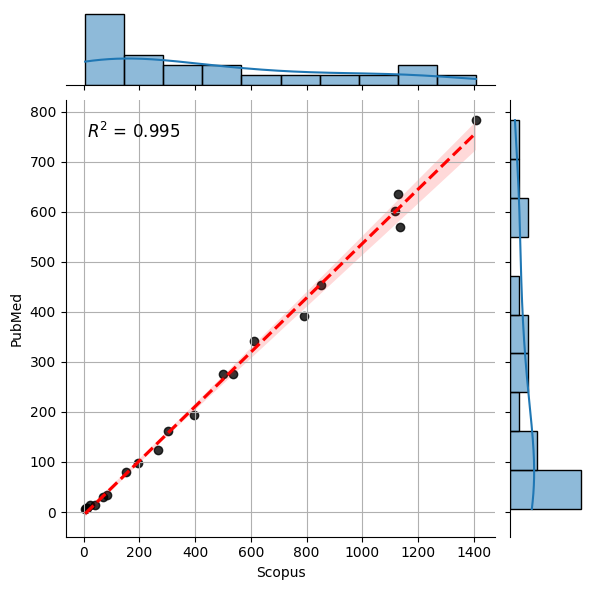

In [5]:
from scipy import stats

# Calcular R^2
r, _ = stats.pearsonr(subset_df["Scopus"], subset_df["PubMed"])
r2 = r ** 2

# Crear jointplot con bins más pequeños
g = sns.jointplot(
    data=subset_df,
    x="Scopus",
    y="PubMed",
    kind="reg",
    marginal_kws=dict(bins=10, fill=True, edgecolor="black"),
    line_kws={'color':'red','linestyle': '--'},
    scatter_kws={'color':'black'}
)

# Añadir texto con R²
g.ax_joint.text(
    0.05, 0.95, f"$R^2$ = {r2:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=12, verticalalignment="top"
)

# Agregar cuadrícula
g.ax_joint.grid(True)

plt.show()


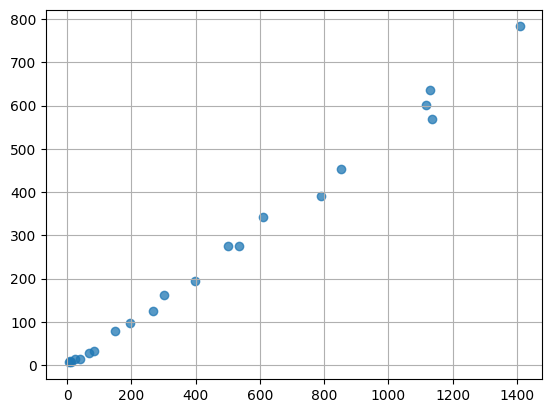

In [6]:
x = subset_df.Scopus
y = subset_df.PubMed

plt.scatter(x,y, alpha=0.75)
plt.grid()
plt.show()

In [7]:
# Calcula el promedio de x
xBar = np.mean(x)
# Calcula el promedio de y
yBar = np.mean(y)
# Calcula el numerador de B1 apoyándote de la función sum
B1num = sum((x-xBar)*(y-yBar))
# Calcula el denominador de B1 apoyándote de la función sum
B1den = sum((x-xBar)**2)
# Calcula B1 como la proporción entre el numerador y el denominador
B1 = B1num / B1den
# Calcula B0
B0 = yBar - (B1*xBar)
# Imprime el valor de B0
print("B0=",round(B0,2))
# Imprime el valor de B1
print("B1=",round(B1,2))

B0= -5.92
B1= 0.54


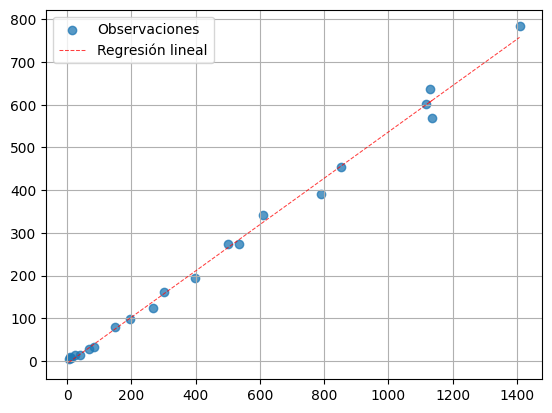

In [8]:
# Usa la función scatter para generar una gráfica de dispersión
plt.scatter(x,y, label= "Observaciones", alpha=0.75)
yHat = B0 + (B1*x)
# Agrega la línea que representa al modelo con la función plot
plt.plot(x, yHat, c = "r", linestyle='dashed', linewidth = 0.75, alpha = 0.75, label="Regresión lineal")
plt.legend()
plt.grid()
# Muestra la gráfica usando la función show
plt.show()

In [9]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PubMed   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4141.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.06e-23
Time:                        03:06:41   Log-Likelihood:                -88.140
No. Observations:                  21   AIC:                             180.3
Df Residuals:                      19   BIC:                             182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9219      5.343     -1.108      0.282     -17.105       5.261
Scopus         0.5422      0.008     64.352      0.000       0.525       0.560
==============================================================================
Omnibus:                        3.322   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.625
Skew:                          -0.607   Prob(JB):                        0.444
Kurtosis:                       3.618   Cond. No.                         918.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""